In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

## 🔄 Método de Gauss-Seidel
Resolver el sistema Ax = b usando *Gauss-Seidel*

A = \[\[4,-1,0\], \[2,7,1\], \[0,-3,5\]\]

b = \[15, 20, 10\]

Condiciones: x₀ = \[0,0,0\], tolerancia = 10⁻⁶, máx 100 iteracionesnes

In [7]:
"""
Queremos reconstruir A como A = L + D + U, y luego poder resolver el sistema
iterativamente como:
x^(k+1) = M_GS * x^k + C_GS
con M_GS = -(D + L)^-1 * U, C_GS = (D + L)^-1 * b
"""

def gauss_seidel(A, b, x0, tol, max_iter):
    # Descomponemos A = L + D + U
    L = np.tril(A, -1)
    U = np.triu(A, 1)
    D = np.diag(np.diag(A))
    
    # Matriz de iteraciones
    M_gs = - np.linalg.inv(D + L) @ U
    C_gs = np.linalg.inv(D + L) @ b
    
    # Iteración
    x = x0.copy()
    for k in range(max_iter):
        x_anterior = x.copy()
        x = M_gs @ x + C_gs
        print(f"Iter {k}, sol = {np.round(x, 3)}") 
        if np.linalg.norm(x - x_anterior, np.inf) < tol:
            print(f"El método está por debajo de la toleracia impuesta, alcanzando como máximo la iteración {k}")
            return x, k+1, np.linalg.eigvals(M_gs)
    return x, max_iter, np.linalg.eigvals(M_gs) # radio espectral para verificar la conv de A

A = np.array([[4,-1,0],[2,7,1],[0,-3,5]])
b = np.array([15, 20, 10])
x0 = np.zeros(3)
sol, iter, autovals = gauss_seidel(A, b, x0, 1e-6, 100)

print(f"radio espectral: {max(abs(autovals)):.3f}") 

Iter 0, sol = [3.75  1.786 3.071]
Iter 1, sol = [4.196 1.219 2.732]
Iter 2, sol = [4.055 1.308 2.785]
Iter 3, sol = [4.077 1.294 2.777]
Iter 4, sol = [4.074 1.297 2.778]
Iter 5, sol = [4.074 1.296 2.778]
Iter 6, sol = [4.074 1.296 2.778]
Iter 7, sol = [4.074 1.296 2.778]
Iter 8, sol = [4.074 1.296 2.778]
Iter 9, sol = [4.074 1.296 2.778]
El método está por debajo de la toleracia impuesta, alcanzando como máximo la iteración 9
radio espectral: 0.157


## Euler

Problema: Resolver $y' = 2t - y + 1$, 
$y(0) = 0$

Intervalo: $[0, 2]$

Paso: $h = 0.1$

Objetivo: Graficar la solución y calcular $y(1)$

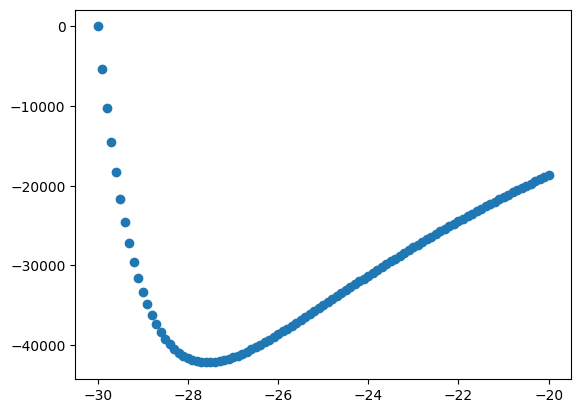

In [15]:
def euler_explicito(f, t0, tf, y0, h, cant_pasos):
    y = y0
    t = t0
    valores_y = [y0]
    valores_t = [t0]

    for _ in range(cant_pasos):
        y = y + h * f(y, t)  # Paso Euler
        t += h
        valores_y.append(y)
        valores_t.append(t)
    return np.array(valores_t), np.array(valores_y)

def f(y, t):
    return 2*t**3 - y + 1

vals_t, vals_y = euler_explicito(f, -30, 20, 0, 0.1, 100)

plt.scatter(vals_t, vals_y)
plt.show()

## Norma 2

**Estimación de Norma-2**

Matriz $A = \begin{bmatrix} 3 & 1 & -1 \\ 1 & 4 & 2 \\ -1 & 2 & 5 \end{bmatrix}$

**Objetivo:** Estimar $||A||_2$ con método iterativo

**Algoritmo:** $s_1 = 0$, $s_{k+1} = \max\{s_k, \frac{||Ax_k||_2}{||x_k||_2}\}$

**Iteraciones:** 50

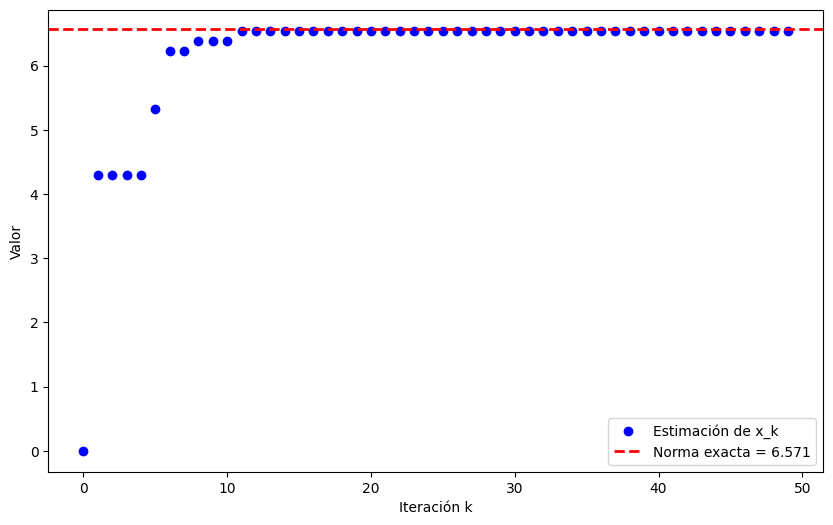

In [50]:
def estimar_norma2(A, n_iter):
    x = np.zeros(n_iter)
    x[0] = 0  # s_1 = 0

    for k in range(1, n_iter):
        z_k = np.random.randn(A.shape[0]) # Vectores aleatorios
        ratio = np.linalg.norm(A @ z_k) / np.linalg.norm(z_k)
        x[k] = max(x[k-1], ratio)
    return x

A = np.array([[3, 1, -1], [1, 4, 2], [-1, 2, 5]])
x_sucesion = estimar_norma2(A, 50)

plt.figure(figsize=(10,6))
plt.scatter(range(len(x_sucesion)), x_sucesion, c='b', label='Estimación de x_k')
plt.axhline(np.linalg.norm(A, 2), color='r', linestyle='--',
            linewidth=2, label = f"Norma exacta = {np.linalg.norm(A,2):.3f}")
plt.xlabel('Iteración k')
plt.ylabel('Valor')
plt.legend()
plt.show()



## Diferencias Finitas
**EDP:** $-u'' + 2u = x^2$ en $[0,1]$

**Condiciones frontera:** $u(0) = 1$, $u(1) = 3$

**Discretización:** $N = 10$ puntos internos

**Objetivo:** Encontrar $u(0.5)$

In [22]:
def resolver_EDP(a, f_func, u0, u1, N):
    h = 1/(N+1)
    x = np.linspace(h, 1-h, N)

    # Discretización: -u'' + a*u = f(x)
    # u'' ≈ (u_{i-1} - 2u_i + u_{i+1})/h²
    # Entonces: -(u_{i-1} - 2u_i + u_{i+1})/h² + a*u_i = f(x_i)
    # Multiplicando por h²: -u_{i-1} + 2u_i - u_{i+1} + a*h²*u_i = h²*f(x_i)
    # Reordenando: -u_{i-1} + (2 + a*h²)*u_i - u_{i+1} = h²*f(x_i)

    A = np.zeros((N, N))
    b = h**2 * f_func(x)

    for i in range(N):
        A[i, i] = 2 + a*h**2     # Coeficiente de u_i
        if i > 0: A[i, i-1] = -1 # Coeficiente de u_{i-1}
        if i < N-1: A[i, i+1] = -1 # Coeficiente de u_{i+1}
    
    b[0] += u0
    b[-1] += u1

    u_interior = np.linalg.solve(A, b)

    x_completo = np.linspace(0, 1, N+2)  # 2 puntos de frontera
    u_completo = np.concatenate(([u0], u_interior, [u1]))

    return x_completo, u_completo

def f(x):
    return x**2

x, u = resolver_EDP(a=2, f_func=f, u0=1, u1=3, N=10)

# Encontrar u(0.5)
idx = np.argmin(np.abs(x - 0.5)) # Encuentra el ÍNDICE del valor mínimo
print(f"u(0.5) = {u[idx]:.6f}")
print(f"x evaluado = {x[idx]:.6f}")

u(0.5) = 1.534379
x evaluado = 0.454545


## Sistema Ecuaciones Diferenciales

$y_1' = y_2$  
$y_2' = -y_1 - 0.1y_2$

**Condiciones iniciales:**  
$y_1(0) = 1$  
$y_2(0) = 0$

**Intervalo:**  
$[0, 10]$, con paso $h = 0.05$

**Objetivo:**  
Graficar la solución y el retrato de fases.
to de fases.ase

In [2]:
from scipy.integrate import solve_ivp

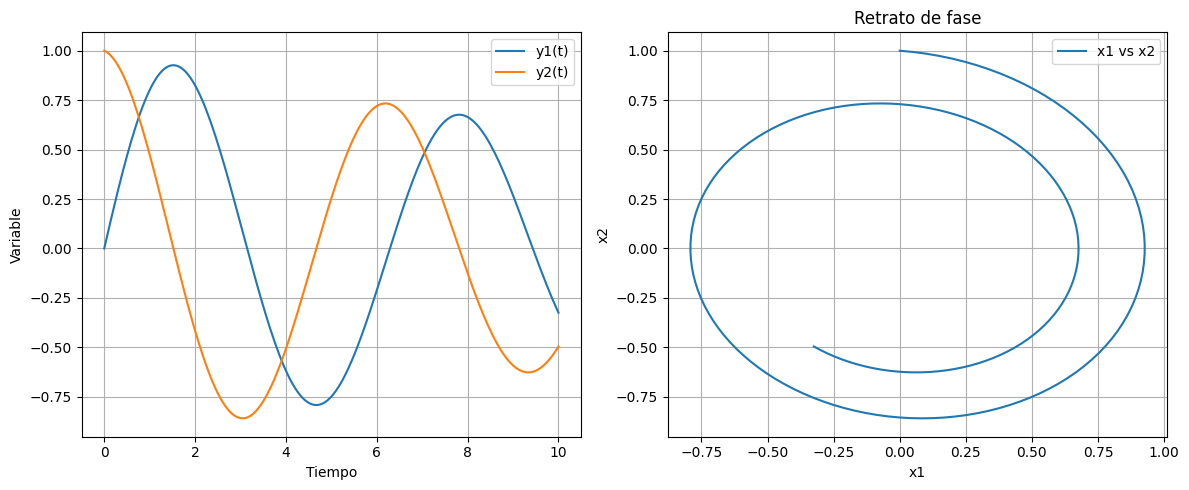

In [13]:
def euler_sistema(F, t0, tf, y0, h):
    solucion = solve_ivp(F, [t0, tf], y0, dense_output=True)
    t = np.arange(t0, tf + h, h) # tf + h para incluir tf
    Y = solucion.sol(t)
    return t, Y

def funcion_5(t, z):
    y1, y2 = z[0], z[1]
    f1 = y2
    f2 = -y1 -0.1*y2
    return [f1, f2]

t, Y = euler_sistema(funcion_5, 0, 10, [0, 1], 0.05)

plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
plt.plot(t, Y[0], label="y1(t)")
plt.plot(t, Y[1], label="y2(t)")
plt.xlabel("Tiempo")
plt.ylabel("Variable")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(Y[0], Y[1], label="x1 vs x2")
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Retrato de fase')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


## ℹ️ Eliminación Gaussiana

**Sistema:** $Ax = b$

**A** = $\begin{bmatrix} 2 & 1 & -1 \\ 4 & 5 & 3 \\ 2 & 1 & 4 \end{bmatrix}$

**b** = $\begin{bmatrix} 8 \\ 9 \\ 11 \end{bmatrix}$

**Método:** Eliminación gaussiana SIN pivoteo

**Objetivo:** Mostrar matriz escalonada y solución

In [7]:
def eliminacion_gaussiana(A, b):
    n = len(A)                              # Número de ecuaciones/incógnitas
    A = A.copy().astype(float)              # Copia para no modificar original
    b = b.copy().astype(float)              # Copia para no modificar original
    
    # Eliminación hacia adelante
    for k in range(n-1):                    # Para cada fila pivote (excepto la última)
        for i in range(k+1, n):             # Para cada fila debajo del pivote
            factor = A[i,k] / A[k,k]        # Factor de eliminación: a_ik / a_kk
            for j in range(k,n):            # Actualizar elementos de la fila i
                A[i,j] -= factor * A[k,j]   # Nueva a_ij = a_ij - factor * a_kj
            b[i] -= factor * b[k]           # Actualizar lado derecho: b_i - factor * b_k
    
    # Solución
    # Sustitución hacia atrás
    x = np.zeros(n)                         # Vector solución inicializado en ceros
    for i in range(n-1, -1, -1):           # Desde la última fila hacia la primera
        x[i] = b[i]                         # Inicializar con el término independiente
        for j in range(i+1, n):             # Restar contribuciones de variables ya conocidas
            x[i] -= A[i,j] * x[j]           # x_i = x_i - a_ij * x_j
        x[i] /= A[i,i]                      # Dividir por el coeficiente diagonal: x_i = x_i / a_ii
    
    return A, b, x                             # Retorna matriz escalonada y vector solución

A = np.array([[2,1,-1], [4,5,3], [2,1,4]])
b = np.array([8,9,11])

A_, b_, sol = eliminacion_gaussiana(A, b)
print(A_)
print(sol)
print(b_)
print(A @ sol)

[[ 2.  1. -1.]
 [ 0.  3.  5.]
 [ 0.  0.  5.]]
[ 5.96666667 -3.33333333  0.6       ]
[ 8. -7.  3.]
[ 8.  9. 11.]


## 📝 EDO con Parámetro

**EDO:** $y' = (y-3)(\sin^2(t)-0.3)$

**Condiciones iniciales:** $y(0) = k$ para $k = 0,1,2,3,4,5,6$

**Intervalo:** $[0, 5]$, $h = 0.01$

**Objetivo:** Graficar familia de soluciones, identificar equilibrio

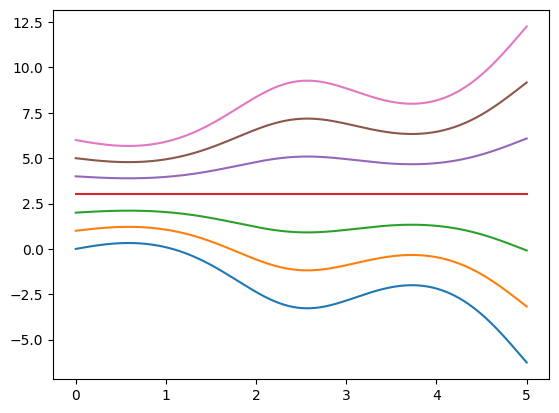

In [26]:
def f(t, y):
    return (y-3)*((np.sin(t))**2 - 0.3)

def euler_explicito(f, t0, tf, y0, h):
    n_pasos = int((tf - t0) / h)
    y = y0
    t = t0
    valores_y = [y0]
    valores_t = [t0]

    for i in range(n_pasos):
        y = y + h * f(t, y) # paso euler
        t += h
        valores_y.append(y)
        valores_t.append(t)
    return np.array(valores_t), np.array(valores_y)

for k in range(7):
    vals_t, vals_y = euler_explicito(f, 0, 5, k, 0.01)
    plt.plot(vals_t, vals_y, label=f'k={k}')
plt.show()

## 🔄 Método de Jacobi

**Sistema:** $Ax = b$

**A** = $\begin{bmatrix} 10 & -1 & 2 \\ -1 & 11 & -1 \\ 2 & -1 & 10 \end{bmatrix}$

**b** = $\begin{bmatrix} 6 \\ 25 \\ -11 \end{bmatrix}$

**Condiciones:** $x_0 = [0,0,0]$, $\text{tol} = 10^{-5}$, máx 1000 iter

**Objetivo:** Verificar convergencia y comparar con Gauss-Seidel

In [31]:
"""
Queremos reconstruir A como A = L + D + U, y luego poder resolver el sistema
iterativamente como:
x^(k+1) = M_J * x^k + C_J
con M_J = -D^-1 * (L + U), C_J = D^-1 * b
"""

def jacobi(A, b, x0, tol, max_iter):
    L = np.tril(A, -1)
    U = np.triu(A, 1)
    D = np.diag(np.diag(A))

    # Matriz y coef de iteraciones
    M_J = -np.linalg.inv(D) @ (L + U)
    C_J = np.linalg.inv(D) @ b

    # Iteración
    x = x0.copy()
    for k in range(max_iter):
        x_anterior = x.copy()
        x = M_J @ x + C_J
        print(f"Iter {k}, sol = {np.round(x, 3)}")
        if np.linalg.norm(x - x_anterior, np.inf) < tol:
            print(f"El método está por debajo de la toleracia impuesta, alcanzando como máximo la iteración {k}")
            return x, k+1, np.linalg.eigvals(M_J)
    return x, max_iter, np.linalg.eigvals(M_J)

A = np.array([[10, -1, 2], [-1, 11, -1], [2, -1, 10]])
b = [6, 25, -11]
x0 = np.zeros(3)

sol, iter, autovals = jacobi(A, b, x0, 1e-8, 100)
print(f"radio espectral: {max(abs(autovals)):.3f}") 

Iter 0, sol = [ 0.6    2.273 -1.1  ]
Iter 1, sol = [ 1.047  2.227 -0.993]
Iter 2, sol = [ 1.021  2.278 -1.087]
Iter 3, sol = [ 1.045  2.267 -1.076]
Iter 4, sol = [ 1.042  2.27  -1.082]
Iter 5, sol = [ 1.043  2.269 -1.081]
Iter 6, sol = [ 1.043  2.269 -1.082]
Iter 7, sol = [ 1.043  2.269 -1.082]
Iter 8, sol = [ 1.043  2.269 -1.082]
Iter 9, sol = [ 1.043  2.269 -1.082]
Iter 10, sol = [ 1.043  2.269 -1.082]
Iter 11, sol = [ 1.043  2.269 -1.082]
Iter 12, sol = [ 1.043  2.269 -1.082]
Iter 13, sol = [ 1.043  2.269 -1.082]
Iter 14, sol = [ 1.043  2.269 -1.082]
El método está por debajo de la toleracia impuesta, alcanzando como máximo la iteración 14
radio espectral: 0.268


## 🔄 Matriz Inversa

**Sistema:** $Ax = b$

**A** = $\begin{bmatrix} 4 & 7 \\ 2 & 6 \end{bmatrix}$

**Objetivo:** Calcular $A^{-1}$ y verificar $A.A^{-1} = I$. Comparar con np.linalg.inv(A)


In [32]:
np.eye(n)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [43]:
def matriz_inversa(A):
   n = len(A)                                                    # Tamaño de la matriz
   # Verificamos que sea invertible
   if abs(np.linalg.det(A)) < 1e-10:                            # Si det(A) ≈ 0, no es invertible
       return None
   A_aum = np.hstack([A.copy().astype(float), np.eye(n)])       # Matriz aumentada [A | I]
   
   # Gauss-Jordan
   for i in range(n):                                           # Para cada columna i
       A_aum[i] = A_aum[i] / A_aum[i,i]                        # Hacer A_aum[i,i] = 1
       for j in range(n):                                       # Para todas las filas
           if i != j:                                           # Excepto la fila i
               A_aum[j] = A_aum[j] - A_aum[j,i] * A_aum[i]     # Hacer A_aum[j,i] = 0
   
   return A_aum[:, n:]                                          # Retornar A⁻¹ (parte derecha)

A = np.array([[4,7,9], [2,6,11.2], [3,4,5]])
A_inv = matriz_inversa(A)
print("A⁻¹ = \n", A_inv) 
print("Verificación: \n", np.round(A @ A_inv, 3))
print("usando linalg: \n", np.linalg.inv(A))

A⁻¹ = 
 [[-0.925   0.0625  1.525 ]
 [ 1.475  -0.4375 -1.675 ]
 [-0.625   0.3125  0.625 ]]
Verificación: 
 [[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0. -0.  1.]]
usando linalg: 
 [[-0.925   0.0625  1.525 ]
 [ 1.475  -0.4375 -1.675 ]
 [-0.625   0.3125  0.625 ]]
